In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cs
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle
from sklearn import (cross_validation, feature_selection, pipeline,
                     preprocessing, linear_model, grid_search)
import pandas as pd
dataset = pd.read_csv('data.csv')
dataset = dataset.drop(['id'], axis=1)
dataset.head()
target = 'diagnosis'
var = dataset.var().sort_values()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
dataset.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
var

fractal_dimension_se            0.000007
smoothness_se                   0.000009
concave points_se               0.000038
fractal_dimension_mean          0.000050
symmetry_se                     0.000068
smoothness_mean                 0.000198
compactness_se                  0.000321
fractal_dimension_worst         0.000326
smoothness_worst                0.000521
symmetry_mean                   0.000752
concavity_se                    0.000911
concave points_mean             0.001506
compactness_mean                0.002789
symmetry_worst                  0.003828
concave points_worst            0.004321
concavity_mean                  0.006355
compactness_worst               0.024755
concavity_worst                 0.043524
radius_se                       0.076902
diagnosis                       0.234177
texture_se                      0.304316
perimeter_se                    4.087896
radius_mean                    12.418920
texture_mean                   18.498909
radius_worst    

In [5]:
dataset = dataset[['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','texture_worst','texture_mean','radius_mean','perimeter_se',target]]

In [6]:
dataset.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,texture_worst,texture_mean,radius_mean,perimeter_se,diagnosis
0,2019.0,1001.0,153.40,184.60,122.80,17.33,10.38,17.99,8.589,1
1,1956.0,1326.0,74.08,158.80,132.90,23.41,17.77,20.57,3.398,1
2,1709.0,1203.0,94.03,152.50,130.00,25.53,21.25,19.69,4.585,1
3,567.7,386.1,27.23,98.87,77.58,26.50,20.38,11.42,3.445,1
4,1575.0,1297.0,94.44,152.20,135.10,16.67,14.34,20.29,5.438,1


In [7]:
sample = dataset[dataset[target] == 1]
control = dataset[dataset[target] == 0]
X_sample = sample.iloc[:, sample.columns != target].values
y_sample = sample.iloc[:, sample.columns ==target].values
X_control = control.iloc[:, control.columns != target].values
y_control = control.iloc[:, control.columns ==target].values
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size = 0.25, random_state = 0)
X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X_control, y_control, test_size = 0.25, random_state = 0)

In [7]:
type( X_test_control)

numpy.ndarray

In [8]:
print(np.concatenate((X_test_sample, X_test_control)).shape)
print(np.concatenate((y_test_sample, y_test_control)).shape)

(143, 9)
(143, 1)


In [25]:
sc = StandardScaler()
sc.fit(np.vstack((X_sample,X_control)))
X_test_sample = sc.transform(X_test_sample)
X_test_control = sc.transform(X_test_control)
X_train_sample = sc.transform(X_train_sample)
X_train_control = sc.transform(X_train_control)

In [10]:
print(np.concatenate((X_test_sample, X_test_control)).shape)
print(np.concatenate((y_test_sample, y_test_control)).shape)

(143, 9)
(143, 1)


In [11]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca.fit(np.vstack((X_control,X_sample)))
# X_train_sample = pca.transform(X_train_sample)
# X_train_control = pca.transform(X_train_control)
# X_test_sample = pca.transform(X_test_sample)
# X_test_control = pca.transform(X_test_control)

In [12]:
print(np.concatenate((X_test_sample, X_test_control)).shape)
print(np.concatenate((y_test_sample, y_test_control)).shape)

(143, 9)
(143, 1)


In [13]:
# X_train_control = np.transpose(X_train_control)
# X_train_sample = np.transpose(X_train_sample)
# import matplotlib.pyplot as plt
# plt.scatter(X_train_sample[0], X_train_sample[1], c='blue', alpha=0.5)
# plt.scatter(X_train_control[0], X_train_control[1], c='red', alpha=0.5)
# plt.savefig('Bdata2d.png', dpi=300)
# plt.show()

In [14]:
# X_train_control = np.transpose(X_train_control)
# X_train_sample = np.transpose(X_train_sample)

In [15]:
import sklearn.cluster as cs
def kMeans(X, k):
    cls= cs.k_means(X,n_clusters = k)
    return cls[0]


# In[48]:


from sklearn.metrics import accuracy_score
from scipy.spatial import distance
old_score = 0.0
score = 0.0
m_opt = 2
n_opt = 2
test_set = np.concatenate((X_test_sample, X_test_control), axis=0)
test_result = np.concatenate((y_test_sample, y_test_control), axis=0)

In [16]:



# In[ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    return(TP, FP, TN, FN)

count = 0
for n in range(1, 21):
    centroids_c= kMeans(X_train_control, k = n)
    for m in range(1, 21):
        predicted = []
        distances = []
        centroids_s= kMeans(X_train_sample, k = m)
        centroids = np.concatenate((centroids_s,centroids_c), axis=0)
        i = 0
        for test_case in test_set:
            distances = []
            j = 0
            for c in centroids:
                dst = distance.euclidean(test_set[i],centroids[j])
                distances.extend([dst])
                j = j + 1
            i = i + 1
            if np.argmin(distances) < n:
                predicted.extend([1])
            else:
                predicted.extend([0])
        TP, FP, TN, FN = perf_measure(test_result, predicted)
        #curr_acc = accuracy_score(test_result,predicted)
        if (TP + TN + FP + FN):
            accuracy = (TP + TN)/(TP + TN + FP + FN)
        else:
            accuracy = 0
        if TP + FN:
            sensitivity = TP /(TP + FN)
        else:
            sensitivity = 0
        if TN + FP:
            specificity = TN /(TN + FP)
        else:
            specificity = 0
        if TP + FP:
            positivePredictiveAccuracy = TP /(TP + FP)
        else:
            positivePredictiveAccuracy = 0
        if TN + FN:
            negativePredictiveAccuracy = TN /(TN + FN)
        else:
            negativePredictiveAccuracy = 0
        score = sensitivity + specificity + positivePredictiveAccuracy + negativePredictiveAccuracy
        count = count + 1
        met = {'m':m,'n':n,'score':score,'accuracy' : accuracy, 'Sensitivity' : sensitivity,'Specificity' : specificity,'Positive_Predictive_Accuracy ' : positivePredictiveAccuracy,'Negative_Predictive_Accuracy:' :negativePredictiveAccuracy}
        data = {'postive_centroid':centroids_s,'negative_centroids':centroids_c}
        output = open('Cdata'+str(count)+'.pkl', 'wb')
        pickle.dump(data, output)
        output.close()
        output = open('Cmeta'+str(count)+'.pkl', 'wb')
        pickle.dump(met, output)
        output.close()

score:  3.8196121325204953
index:  169


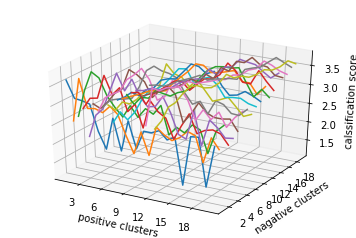

In [17]:
import pickle
count = 1
ms = []
ns = []
scores = []
accuracies = []
sensitivities = []
specificities = []
positive_Predictive_Accuracies = []
negative_Predictive_Accuracies = []
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
score = 0
index = 0
while count < 400:
    output = open('Cmeta'+str(count)+'.pkl', 'rb')
    data = pickle.load(output)
    output.close()
    ms.append(data['m'])
    ns.append(data['n'])
    scores.append(data['score'])
    accuracies.append(data['accuracy'])
    sensitivities.append(data['Sensitivity'])
    specificities.append(data['Specificity'])
    positive_Predictive_Accuracies.append(data['Positive_Predictive_Accuracy '])
    negative_Predictive_Accuracies.append(data['Negative_Predictive_Accuracy:'])
    if data['score'] > score:
        score = data['score']
        index = count
    if count%20 == 0:
        # ax.plot(ms,ns,accuracies)
        # ax.plot(ms,ns,sensitivities)
        # ax.plot(ms,ns,specificities)
        # ax.plot(ms,ns,positive_Predictive_Accuracies)
        # ax.plot(ms,ns,negative_Predictive_Accuracies)
        ax.plot(ms,ns,scores)
        ms = []
        ns = []
        scores = []
        accuracies = []
        sensitivities = []
        specificities = []
        positive_Predictive_Accuracies = []
        negative_Predictive_Accuracies = []
    count = count + 1
##################################################################################
ax.set_xlabel('positive clusters')
ax.set_ylabel('nagative clusters')
ax.set_zlabel('calssification score')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
print ('score: ', score)
print ('index: ',index)
plt.savefig('score.png', dpi=300, quality = 95)

In [60]:
import pickle
output = open('Cmeta169.pkl', 'rb')
meta = pickle.load(output)
output.close()
print(meta)

{'Negative_Predictive_Accuracy:': 0.9565217391304348, 'm': 9, 'accuracy': 0.958041958041958, 'Sensitivity': 0.9245283018867925, 'score': 3.8196121325204953, 'n': 9, 'Specificity': 0.9777777777777777, 'Positive_Predictive_Accuracy ': 0.9607843137254902}


In [8]:
import pickle
output = open('Cdata169.pkl', 'rb')
data = pickle.load(output)
output.close()
print(data)

{'negative_centroids': array([[-0.47084035, -0.41153486, -0.42784558, -0.44788838, -0.37320475,
        -0.55235052, -0.44943826, -0.35491327, -0.44586337],
       [-0.20561375, -0.07746332, -0.31549815, -0.10889552,  0.01176818,
        -1.13975433, -1.08053469,  0.04314709, -0.35723299],
       [-0.47343828, -0.39690535, -0.43243111, -0.47361343, -0.38426475,
         1.33040701,  1.72252213, -0.3555851 , -0.49543848],
       [-0.69397384, -0.6908809 , -0.50844129, -0.77060961, -0.7356459 ,
        -1.19425318, -1.24219323, -0.72531641, -0.59630635],
       [-0.63530375, -0.64823992, -0.49209673, -0.67374348, -0.66994662,
         0.27799082,  0.02611979, -0.66290291, -0.53972908],
       [-0.94448086, -1.09523293, -0.52111223, -1.18407735, -1.34998772,
         1.02044648,  1.14647968, -1.35315231, -0.4735936 ],
       [-1.01094594, -1.14015079, -0.46786076, -1.25594607, -1.37079751,
        -1.24975388, -1.18749813, -1.41757878, -0.27556336],
       [-0.23779565, -0.12100745, -0.22

In [9]:
import numpy as np
positive_cluster_centeroids = np.array([])
for i in range(9):
    positive_cluster_centeroids = np.append(positive_cluster_centeroids,data['postive_centroid'][i],axis=0) 
positive_cluster_centeroids = positive_cluster_centeroids.reshape(9,9)

In [10]:
import numpy as np
negative_cluster_centeroids = np.array([])
for i in range(9):
    negative_cluster_centeroids = np.append(negative_cluster_centeroids,data['negative_centroids'][i],axis=0) 
negative_cluster_centeroids = negative_cluster_centeroids.reshape(9,9)

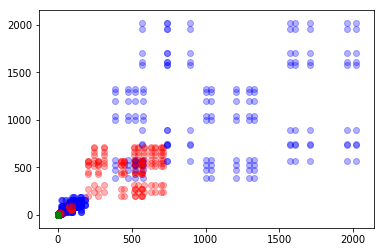

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
# plt.figure(1)
# plt.subplot(211)
#dataset = dataset[['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','texture_worst','texture_mean','radius_mean','perimeter_se',target]]
# plt.scatter(sample['area_mean'], sample['texture_worst'], c= 'blue',alpha = 0.3)                 
# # plt.subplot(212)
#  plt.scatter(control['area_mean'], control['texture_worst'], c= 'red',alpha = 0.3)
sample = sample.values
control = control.values
count = 0
for i in range(9):
    for j in range(9):
        plt.scatter(sample[i], sample[j], c= 'blue',alpha = 0.3)
        plt.scatter(control[i], control[j], c= 'red',alpha = 0.3)
        plt.scatter(negative_cluster_centeroids[i], negative_cluster_centeroids[j], c='black')
        plt.scatter(positive_cluster_centeroids[i], positive_cluster_centeroids[j], c='green')
        plt.savefig('d'+str(i)+'-'+str(j)+'.png')